In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Complete")

Complete


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/musical/master/Ditto_Playlist_Data%20-%20Sheet1.csv', parse_dates=['RELEASE'])
df

,ID,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.
0,1,1901 Bo Flex'd (Passion Pit Remix) - REMIX VER...,Phoenix,2009-10-20,144,80,54,-9,13,4:15,0,0
1,2,Napoleon says,Phoenix,2006-05-12,123,74,54,-3,65,3:14,1,15
2,3,Tighten Up,The Black Keys,2010-04-13,109,71,50,-6,58,3:31,0,40
3,4,North American Scum,LCD Soundsystem,2007-03-12,138,84,88,-5,70,5:29,1,55
4,5,Sleepyhead,Passion Pit,2008-09-16,106,97,57,-3,75,2:55,43,56
5,6,On Melancholy Hill,Gorillaz,2010-03-03,120,74,69,-6,59,3:54,0,75
6,7,Chinatown,Wild Nothing,2010-05-25,126,70,54,-6,25,3:19,0,1
7,8,Blessa,Toro y Moi,2010-02-23,100,46,54,-10,17,2:43,59,0
8,9,How Deep Is Your Love?,The Rapture,2011-07-25,122,83,47,-4,13,6:28,0,2
9,10,Ritual Union,Little Dragon,2011-06-20,144,74,70,-4,80,3:34,4,0


In [3]:
df.describe()

,ID,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,101.000000,130.353234,74.766169,59.567164,-6.253731,55.293532,11.218905,23.049751
std,58.167861,23.188135,15.985933,16.799009,2.184101,23.191559,19.633691,23.981191
min,1.000000,76.000000,19.000000,8.000000,-13.000000,4.000000,0.000000,0.000000
25%,51.000000,117.000000,67.000000,50.000000,-8.000000,39.000000,0.000000,0.000000
50%,101.000000,127.000000,77.000000,59.000000,-6.000000,57.000000,1.000000,18.000000
75%,151.000000,144.000000,86.000000,72.000000,-5.000000,74.000000,13.000000,44.000000
max,201.000000,215.000000,100.000000,96.000000,-2.000000,98.000000,98.000000,78.000000


In [4]:
#get the last 4 characters from Date xx/xx/xxxx or xxxx for consistency
df['YEAR'] = df['RELEASE'].dt.year

In [5]:
#not sure if this is needed when parse_dates is used to convert Year
df['YEAR'] = df['YEAR'].convert_objects(convert_numeric=True)

/home/nbuser/anaconda3_431/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [6]:
df = df.drop('RELEASE', 1)

In [7]:
df

,ID,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,YEAR
0,1,1901 Bo Flex'd (Passion Pit Remix) - REMIX VER...,Phoenix,144,80,54,-9,13,4:15,0,0,2009
1,2,Napoleon says,Phoenix,123,74,54,-3,65,3:14,1,15,2006
2,3,Tighten Up,The Black Keys,109,71,50,-6,58,3:31,0,40,2010
3,4,North American Scum,LCD Soundsystem,138,84,88,-5,70,5:29,1,55,2007
4,5,Sleepyhead,Passion Pit,106,97,57,-3,75,2:55,43,56,2008
5,6,On Melancholy Hill,Gorillaz,120,74,69,-6,59,3:54,0,75,2010
6,7,Chinatown,Wild Nothing,126,70,54,-6,25,3:19,0,1,2010
7,8,Blessa,Toro y Moi,100,46,54,-10,17,2:43,59,0,2010
8,9,How Deep Is Your Love?,The Rapture,122,83,47,-4,13,6:28,0,2,2011
9,10,Ritual Union,Little Dragon,144,74,70,-4,80,3:34,4,0,2011


In [8]:
#hack because pandas thinks that our minutes are hours
time = pd.DatetimeIndex(df['LENGTH'])
seconds = time.hour * 60 + time.minute

In [9]:
(df['Seconds']) = seconds

In [10]:
df = df.drop('LENGTH', 1)

In [11]:
df.to_csv('spotify cleaned.csv')

/home/nbuser/anaconda3_431/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/home/nbuser/anaconda3_431/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Proxima Nova'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


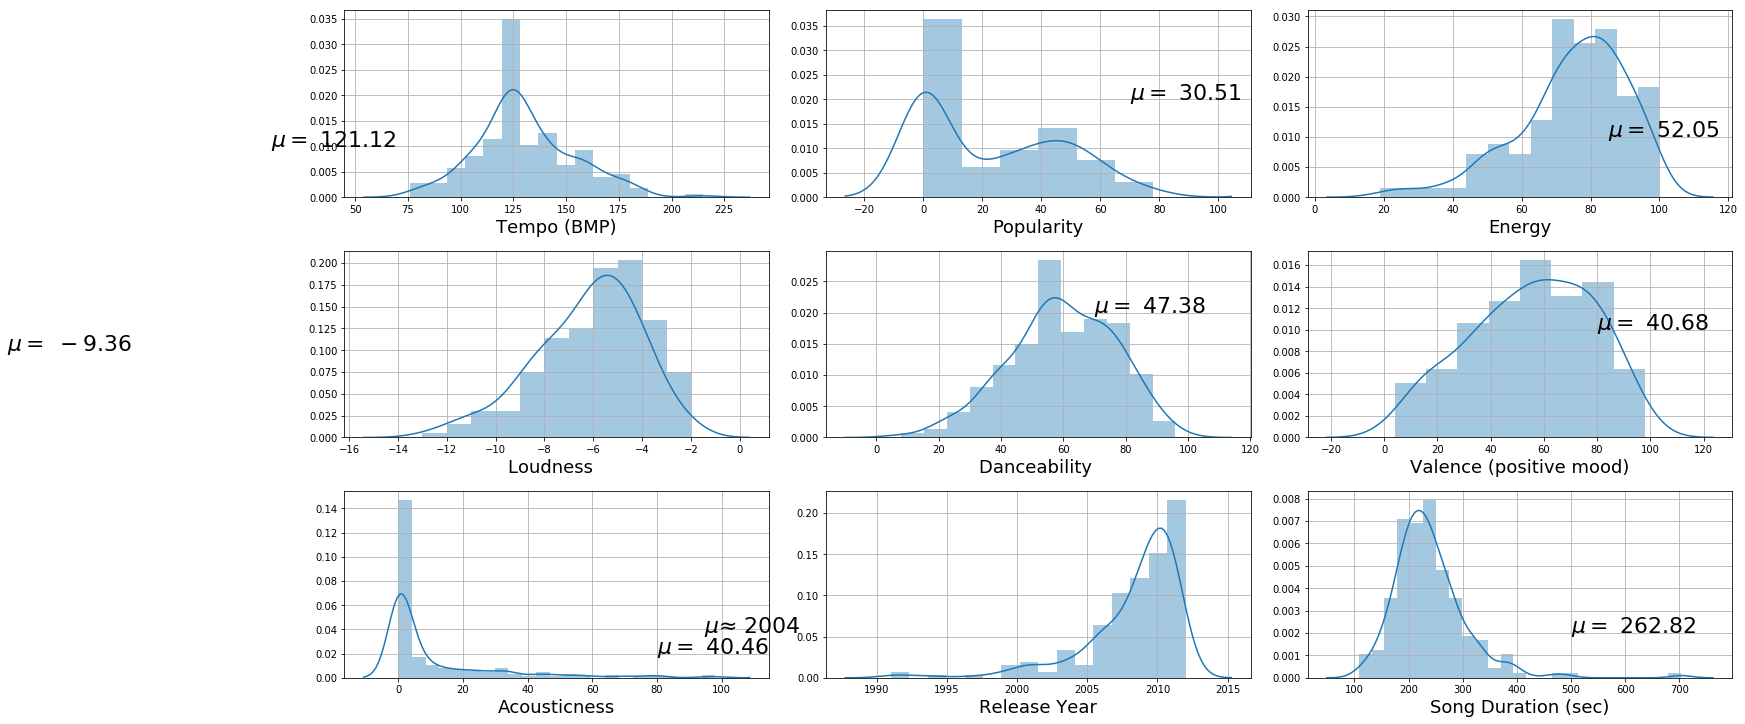

In [12]:
plt.figure(1, figsize=(20, 10),)

hfont = {'fontname':'Proxima Nova'}

plt.subplot(331)
sns.distplot(df.BPM);
plt.text(10, .010, r'$\mu=\ 121.12$', fontsize=22)
plt.xlabel('Tempo (BMP)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(332)
sns.distplot(df['POP.']);
plt.text(70, .020, r'$\mu=\ 30.51$', fontsize=22)
plt.xlabel('Popularity', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(333)
sns.distplot(df.ENERGY);
plt.text(85, .010, r'$\mu=\ 52.05$', fontsize=22)
plt.xlabel('Energy', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(334)
sns.distplot(df.LOUD);
plt.text(-30, 0.10, r'$\mu=\ -9.36$', fontsize=22)
plt.xlabel('Loudness  ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(335)
sns.distplot(df.DANCE);
plt.text(70, 0.02, r'$\mu=\ 47.38$', fontsize=22)
plt.xlabel('Danceability ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(336)
sns.distplot(df.VALENCE);
plt.text(80, 0.01, r'$\mu=\ 40.68$', fontsize=22)
plt.xlabel('Valence (positive mood)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(337)
sns.distplot(df.ACOUSTIC);
plt.text(80, 0.02, r'$\mu=\ 40.46$', fontsize=22)
plt.xlabel('Acousticness', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(338)
sns.distplot(df.YEAR);
plt.xlabel('Release Year', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(339)
sns.distplot(df.Seconds);
#this corresponds to YEAR above, but somehow Matplot fucked it up when changing it
plt.text(-1100, 0.002, r'$\mu≈\ 2004$', fontsize=22)

#Seconds 
plt.text(500, 0.002, r'$\mu=\ 262.82$', fontsize=22)
plt.xlabel('Song Duration (sec)', fontsize=18, **hfont)
plt.grid(True)

plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=1.0)

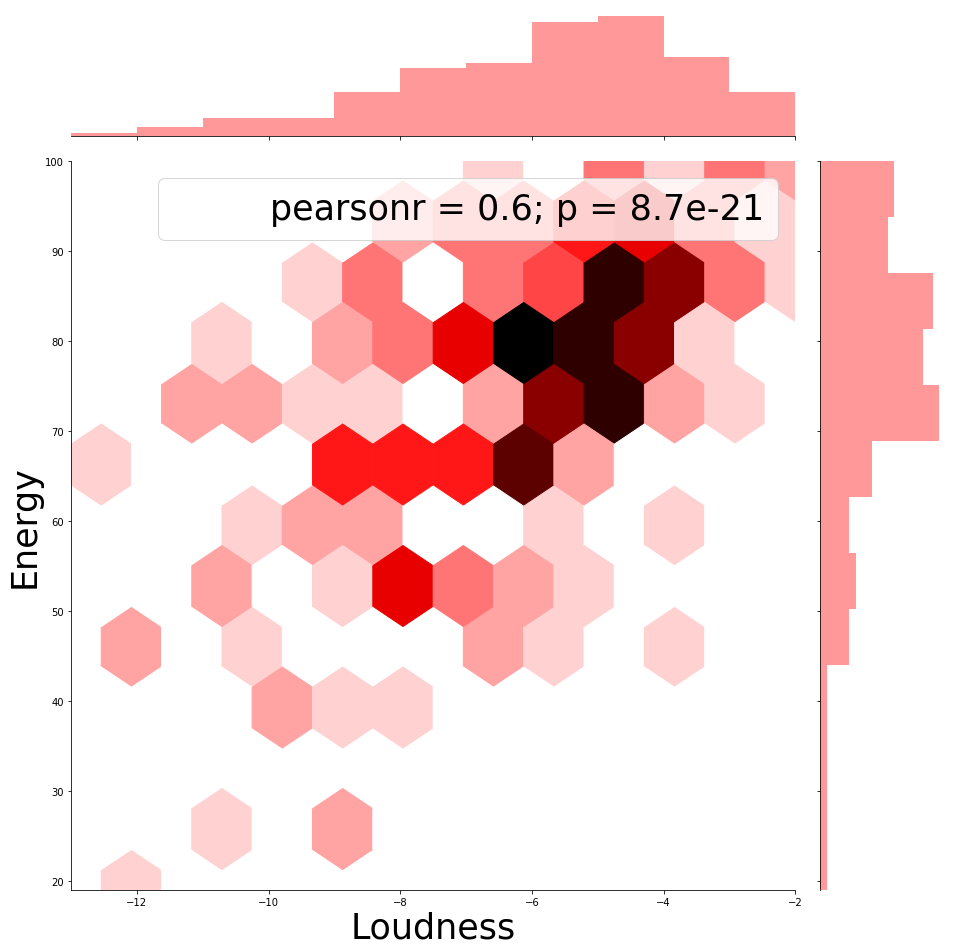

In [33]:

plt.rc("legend", fontsize=35)
sns.jointplot(y=df['ENERGY'], x=df['LOUD'], kind="hex", color="r", size=13).set_axis_labels("Loudness", "Energy", fontsize=35)
#sns.jointplot(y=df['ENERGY'], x=df['ACOUSTIC'], kind="hex", color="r", size=13).set_axis_labels("Acousticness", "Energy", fontsize=35)
#sns.jointplot(y=df['DANCE'], x=df['VALENCE'], kind="hex", color="r", size=13).set_axis_labels("Valence (positive mood)", "Danceability", fontsize=35)
#sns.jointplot(y=df['ACOUSTIC'], x=df['LOUD'], kind="hex", color="r", size=13).set_axis_labels("Loudness", "Acousticness", fontsize=35)
#sns.jointplot(y=df['ENERGY'], x=df['VALENCE'], kind="hex", color="r", size=13).set_axis_labels("Valence (positive mood)", "Energy", fontsize=35)
#sns.jointplot(y=df['POP.'], x=df['ENERGY'], kind="hex", color="r", size=13).set_axis_labels("Energy", "Popularity", fontsize=35)
#sns.jointplot(y=df['YEAR'], x=df['LOUD'], kind="hex", color="r", size=13).set_axis_labels("Loudness", "Release Year", fontsize=35)

In [14]:
x = df.drop(['ID', 'TITLE', 'ARTIST'], axis=1)
#y = df['POP.']
x

,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
0,144,80,54,-9,13,0,0,2009,255
1,123,74,54,-3,65,1,15,2006,194
2,109,71,50,-6,58,0,40,2010,211
3,138,84,88,-5,70,1,55,2007,329
4,106,97,57,-3,75,43,56,2008,175
5,120,74,69,-6,59,0,75,2010,234
6,126,70,54,-6,25,0,1,2010,199
7,100,46,54,-10,17,59,0,2010,163
8,122,83,47,-4,13,0,2,2011,388
9,144,74,70,-4,80,4,0,2011,214


In [15]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(x)

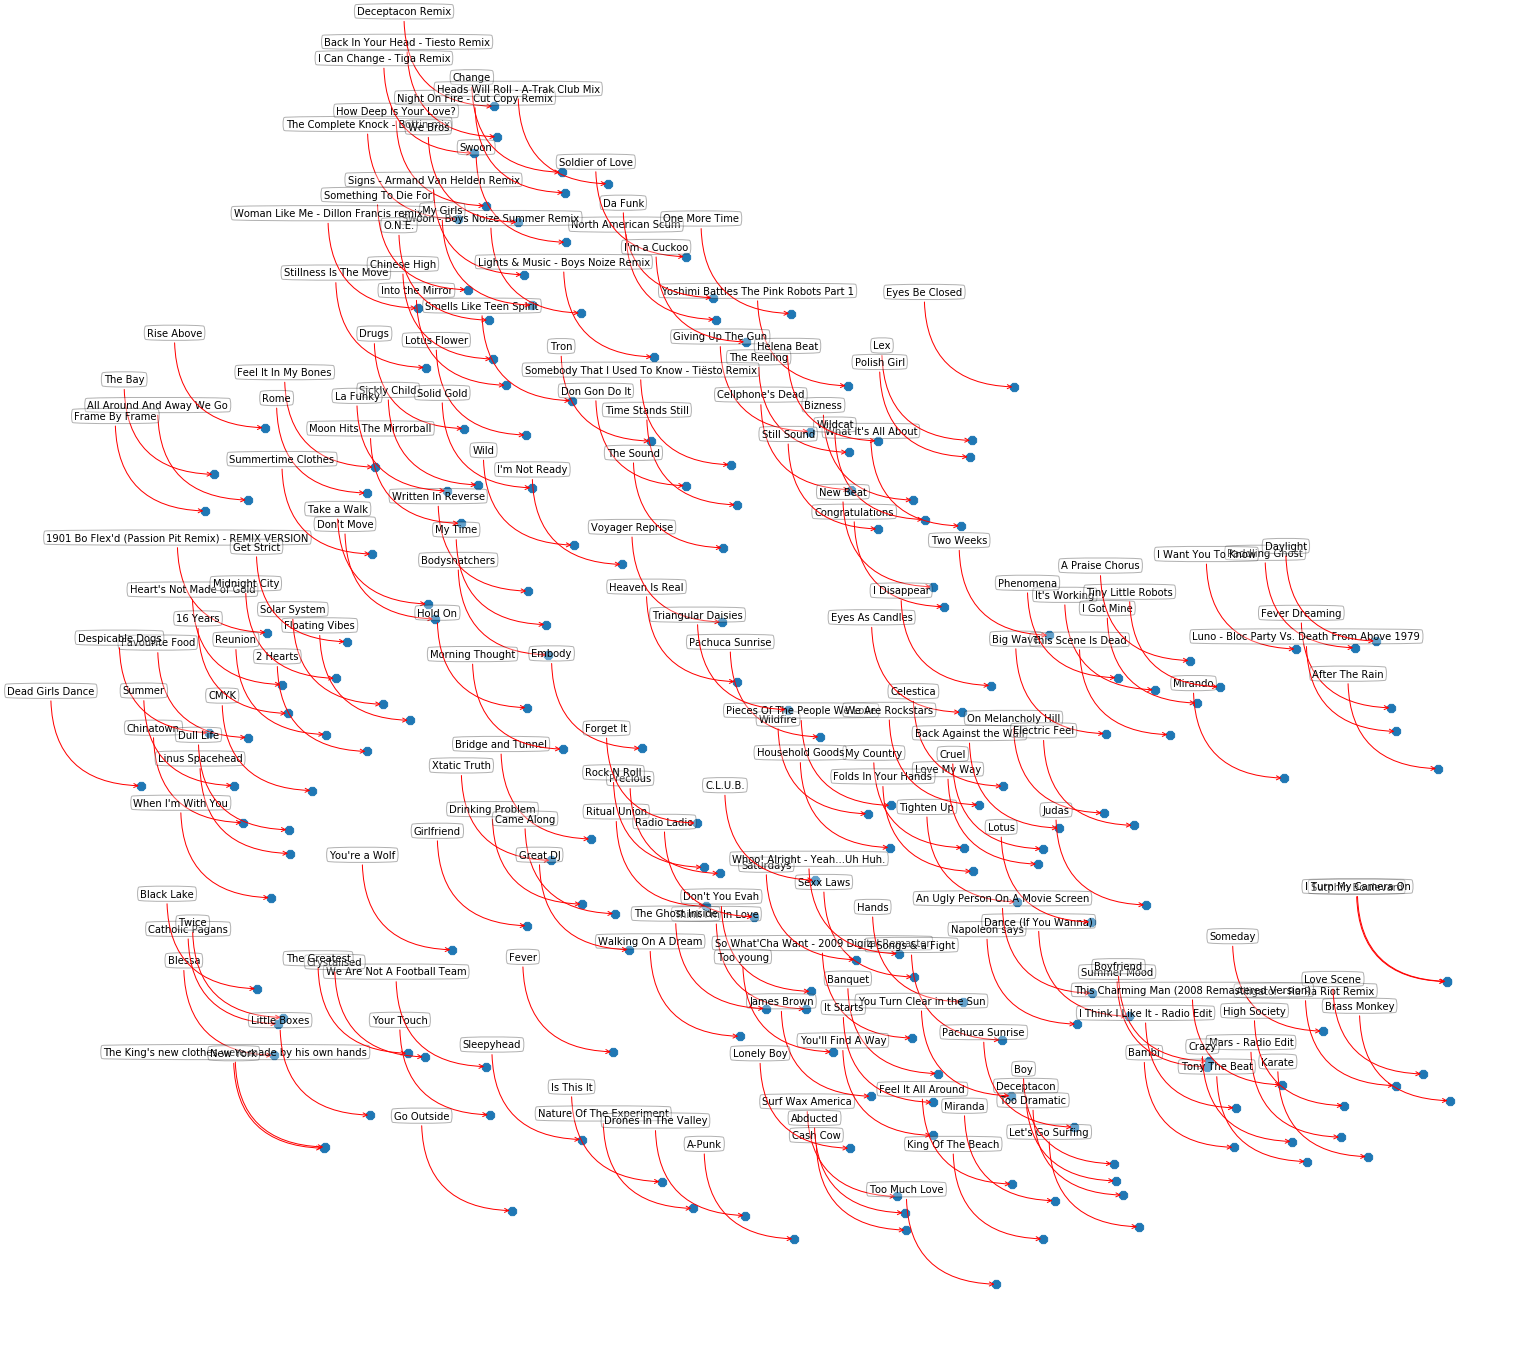

In [16]:
from matplotlib.pyplot import *
fig = figure(figsize=(20, 20))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1], s=80,   marker="8")

for row_id in range(0, len(df)):
    #if (df.ARTIST[row_id] in ['The National']):
        target_word = df.TITLE[row_id]
        xx = X_embedded[row_id, 0]
        yy = X_embedded[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=10, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))

In [17]:
x.corr()

,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
BPM,1.000000,0.231162,-0.326904,0.093692,-0.055933,-0.096663,-0.013483,-0.194810,-0.142721
ENERGY,0.231162,1.000000,-0.273943,0.596891,0.053512,-0.498876,0.082185,-0.038408,-0.006450
DANCE,-0.326904,-0.273943,1.000000,-0.167219,0.426372,-0.020495,0.013172,-0.079428,0.195581
LOUD,0.093692,0.596891,-0.167219,1.000000,0.101275,-0.404580,0.033940,0.069375,-0.084739
VALENCE,-0.055933,0.053512,0.426372,0.101275,1.000000,-0.054300,0.175813,-0.220485,-0.150869
ACOUSTIC,-0.096663,-0.498876,-0.020495,-0.404580,-0.054300,1.000000,0.018338,-0.025012,-0.179299
POP.,-0.013483,0.082185,0.013172,0.033940,0.175813,0.018338,1.000000,-0.180943,-0.051360
YEAR,-0.194810,-0.038408,-0.079428,0.069375,-0.220485,-0.025012,-0.180943,1.000000,0.019947
Seconds,-0.142721,-0.006450,0.195581,-0.084739,-0.150869,-0.179299,-0.051360,0.019947,1.000000


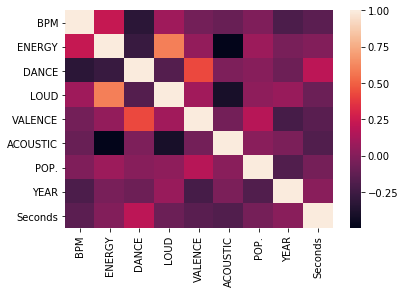

In [18]:
sns.heatmap(x.corr())

In [19]:
x

,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
0,144,80,54,-9,13,0,0,2009,255
1,123,74,54,-3,65,1,15,2006,194
2,109,71,50,-6,58,0,40,2010,211
3,138,84,88,-5,70,1,55,2007,329
4,106,97,57,-3,75,43,56,2008,175
5,120,74,69,-6,59,0,75,2010,234
6,126,70,54,-6,25,0,1,2010,199
7,100,46,54,-10,17,59,0,2010,163
8,122,83,47,-4,13,0,2,2011,388
9,144,74,70,-4,80,4,0,2011,214


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
print(pca.explained_variance_ratio_)

[ 0.65569539  0.09813697]


In [22]:
x_pca = pca.fit_transform(x)

In [23]:
from sklearn import svm
clf = svm.OneClassSVM(kernel="rbf", gamma=0.001, nu=0.3)
clf.fit(x_pca)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, nu=0.3, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

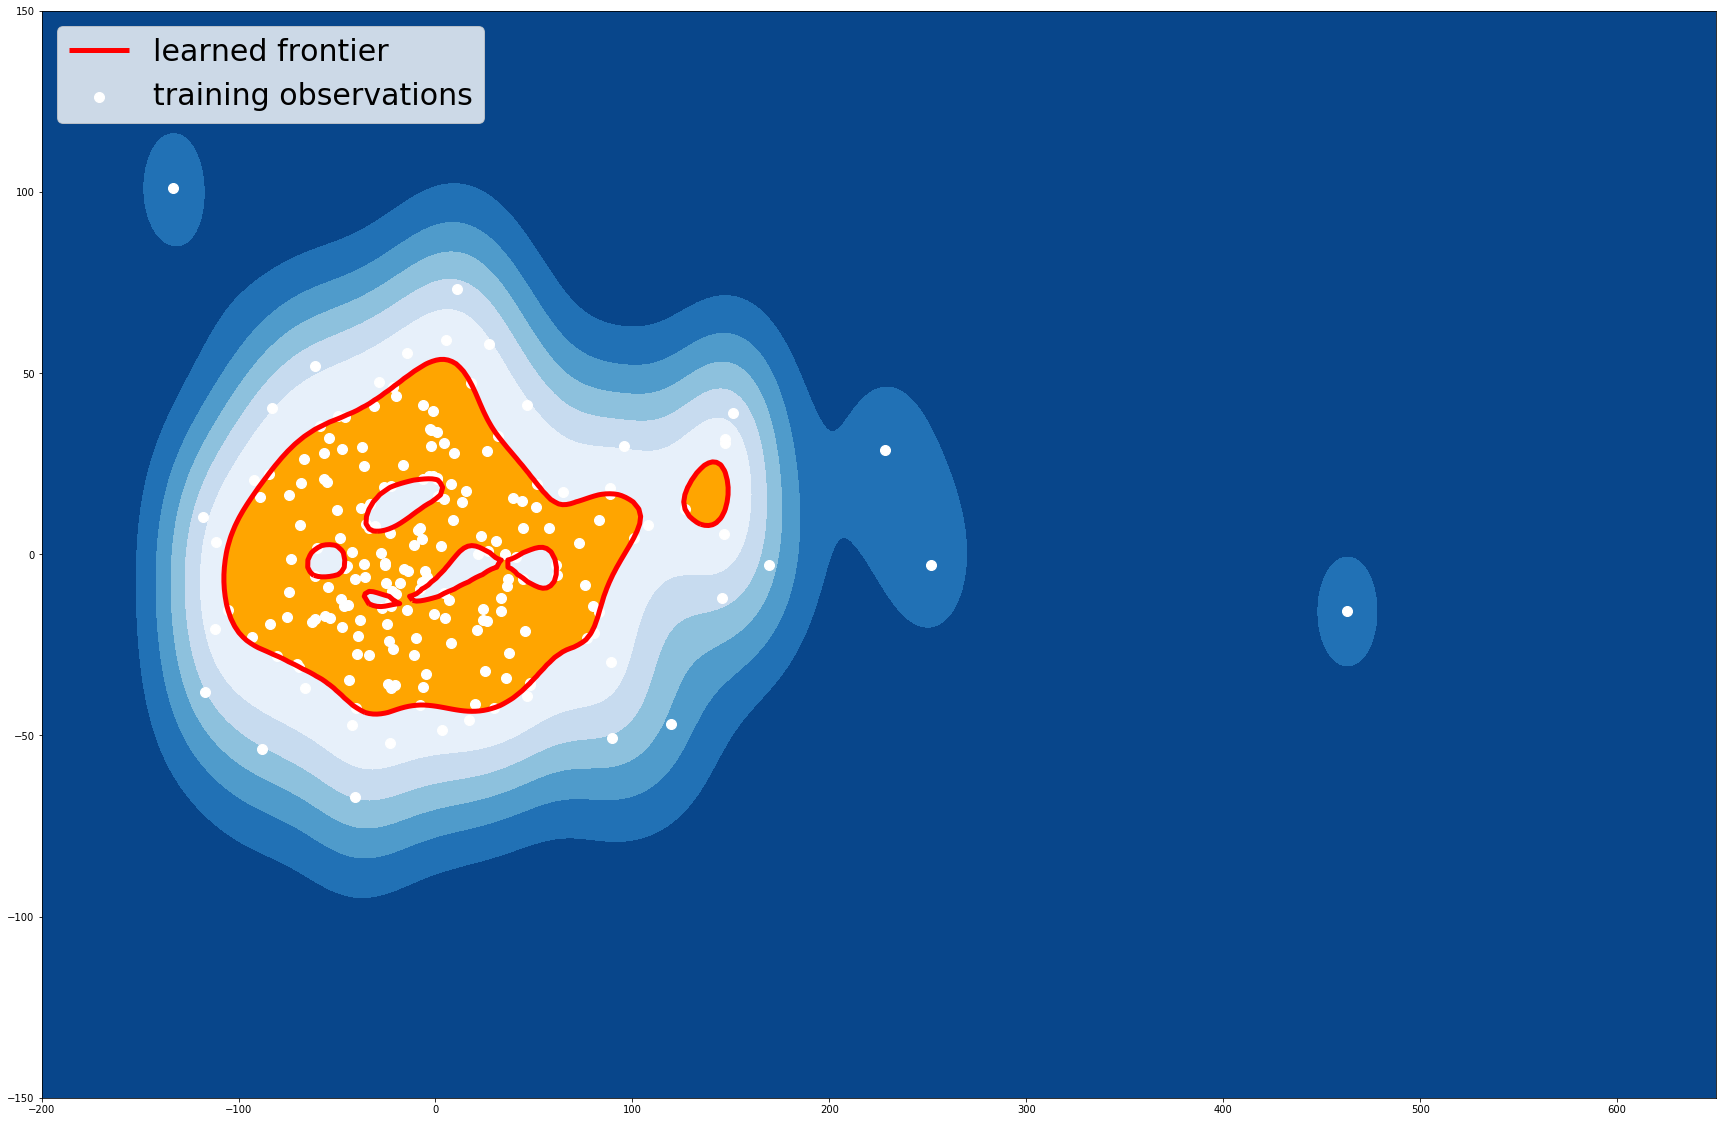

In [24]:
xx, yy = np.meshgrid(np.linspace(-200, 800, 500), np.linspace(-200,800, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(30, 20),)
#plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=5, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

#visualize song titles
'''
for row_id in range(0, len(df)):
    #if (df.ARTIST[row_id] in ['The National']):
        target_word = df.TITLE[row_id]
        xxx = x_pca[row_id, 0]
        yyy = x_pca[row_id, 1]
        plt.annotate(target_word, (xxx,yyy), size=10, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))
'''   

b1 = plt.scatter(x_pca[:, 0], x_pca[:, 1], c='white', s=100)
plt.axis('tight')
plt.xlim((-200, 650))
plt.ylim((-150, 150))

leg = plt.legend([a.collections[0], b1, ],
           ["learned frontier", "training observations"],
           loc="upper left",prop={'size':30}, frameon=True)

plt.show()

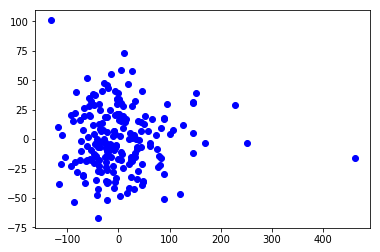

In [25]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c='blue')